# Assignment IV

### 

Consider the following code representation of a Fourier series 

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# I had to put this to remove the warnning message from scipy of 'too many divisions'
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0.98, 'Partial sums for Fourier series of f(x)')

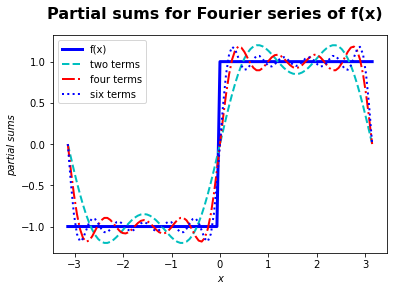

In [3]:
x=np.linspace(-np.pi,np.pi,101)
f=np.ones_like(x)
f[x<0]=-1
y1=(4/np.pi)*(np.sin(x)+np.sin(3*x)/3.0)
y2=y1+(4/np.pi)*(np.sin(5*x)/5.0+np.sin(7*x)/7.0) 
y3=y2+(4/np.pi)*(np.sin(9*x)/9.0+np.sin(11*x)/11.0) 
plt.ion()
plt.plot(x,f,"b-",lw=3,label="f(x)")
plt.plot(x,y1,"c--",lw=2,label="two terms") 
plt.plot(x,y2,"r-.",lw=2,label="four terms") 
plt.plot(x, y3,"b:",lw=2,label="six terms") 
plt.legend(loc="best")
plt.xlabel("x",style="italic")
plt.ylabel("partial sums",style="italic") 
plt.suptitle("Partial sums for Fourier series of f(x)", size=16,weight="bold")

$1.$ Based on the example above:

a-) include in the code a for cicle to plot the original function and the terms in the Fourier series from $y_1$ to $y_n$, where $n$ is the value that be free to the user.

In [7]:
n = input('Which would you like the value of n be?')

Which would you like the value of n be? 3


In [8]:
def FourierSolve(f,x,N):
    result = np.zeros(len(x))
    for n in range(N):
        result += f(x,n+1)
    return result

In [9]:
fs_1n = lambda x,n: 4/np.pi * ( 1/(4*n - 3) * np.sin((4*n - 3)*x) + 1/(4*n - 1) * np.sin((4*n - 1)*x))

x_1 = np.linspace(-np.pi, np.pi, 101)
y_1 = FourierSolve(f_1n, x, 4)

plt.plot(x_1, y_1)

NameError: name 'f_1n' is not defined

b-) Write a general code to solve and represent the fourier series of a given function (that is, your code must be resolve symbolically or numerically the integrals for the coeffcients). Here one that you can reproduce  https://www.youtube.com/watch?v=dZrShAGqT44

$2.$ In each case, find the Fourier series, plot the function and the $n$-th partial sums of its Fourier series for $N=$ $1,2, \ldots, 20 .$ Discuss the convergence of the partial sums by considering their graphs. Be specific at the points of discontinuity.

a-) $f(x)=|x|$ if $-\pi \leq x<\pi .$ Hint: the Fourier series is $\frac{\pi}{2}-\frac{4}{\pi} \sum_{k=0}^{\infty} \frac{1}{(2 k+1)^{2}} \cos (2 k+1) x$


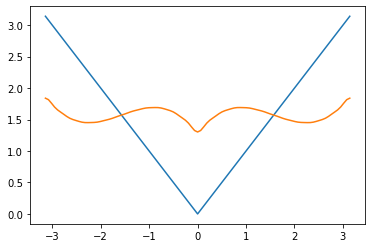

In [10]:
fs_2n = lambda x,k:((1/(2*k+1)**2)*np.cos((2*k + 1)*x))
x_2 = np.linspace(-np.pi, np.pi, 101)
y_2 = np.pi/2 - 4/np.pi * FourierSolve(fs_2n, x_2, 10)
y_2r = np.abs(x_2)
plt.plot(x_2, y_2r)
plt.plot(x_2, y_2)

b-) $f(x)=\left\{\begin{array}{ll}1 & \text { if } \quad 0<x<\pi / 2 \\ -1 & \text { if }-\pi / 2<x<0 \\ 0 & \text { if } \pi / 2<|x|<\pi\end{array}\right.$
Hint: the Fourier series is $\quad \frac{2}{\pi} \sum_{n=1}^{\infty} \frac{1}{n}\left(1-\cos \frac{n \pi}{2}\right) \sin n x$

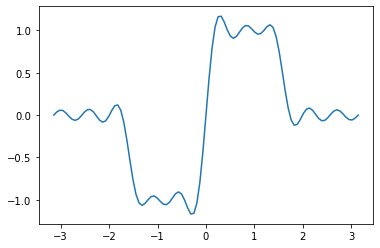

In [176]:
fs_3n = lambda x,n:1/n * (1 - np.cos(n*np.pi/2))*np.sin(n*x)
x_3 = np.linspace(-np.pi, np.pi, 101)
y_3 = 2/np.pi * FourierSolve(fs_3n, x_3, 10)
#y_3r = np.piecewise(x_3, [x_3 < np.pi/2 and 0 < x_3, x_3 >= 0], [-1, 1])
#plt.plot(x_3, y_3r)
plt.plot(x_3, y_3)

c-) $f(x)=|\sin x|$ if $-\pi \leq x \leq \pi .$ Hint: the Fourier series is $\frac{2}{\pi}-\frac{4}{\pi} \sum_{k=1}^{\infty} \frac{1}{(2 k)^{2}-1} \cos 2 k x$

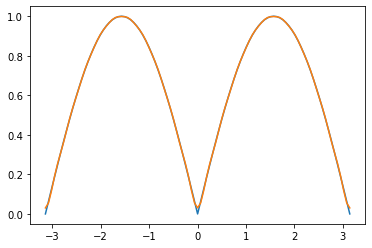

In [177]:
fs_4n = lambda x,k:1/((2*k)**2 - 1)*np.cos(2*k*x)
x_4 = np.linspace(-np.pi, np.pi, 101)
y_4 = 2/np.pi - 4/np.pi * FourierSolve(fs_4n, x_4, 10)
y_4r = np.abs(np.sin(x_4))
plt.plot(x_4, y_4r)
plt.plot(x_4, y_4)

d-) $f(x)=|\cos x|$ if $-\pi \leq x \leq \pi$
Hint: the Fourier series is $\quad \frac{2}{\pi}-\frac{4}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k}}{(2 k)^{2}-1} \cos 2 k x$

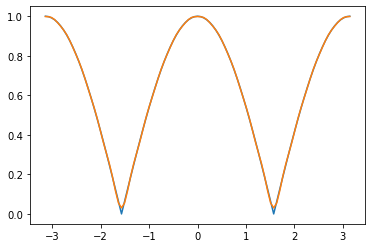

In [178]:
fs_5n = lambda x,k:((-1)**k)/((2*k)**2 - 1)*np.cos(2*k*x)
x_5 = np.linspace(-np.pi, np.pi, 101)
y_5 = 2/np.pi - 4/np.pi * FourierSolve(fs_5n, x_5, 10)
y_5r = np.abs(np.cos(x_5))
plt.plot(x_5, y_5r)
plt.plot(x_5, y_5)

<img src="image.png">

$3.$  Let $f(x)$ denote the shape of a plucked string of length
$p$ with endpoints fastened at $x=0$ and $x=p,$ as shown in the figure above.

a-) Using the data in the figure, derive the formula

$$
f(x)=\left\{\begin{array}{ll}
\frac{h}{a} x & \text { if } 0 \leq x \leq a \\
\frac{h}{a-p}(x-p) & \text { if } a \leq x \leq p
\end{array}\right.
$$

b-) Obtain the sine series representation of $f$

$$
f(x)=\frac{2 h p^{2}}{a(-a+p) \pi^{2}} \sum_{n=1}^{\infty} \frac{\sin \frac{a n \pi}{p}}{n^{2}} \sin \frac{n \pi}{p} x
$$

c-) Verify this representation by taking $a=1 / 3, p=1, h=1 / 10$ and plotting the resulting function $f$ along with several partial sums of its Fourier series.

$4.$ Compute the Fourier series for the function $f(x)=x^{4}$ on the interval $[-\pi, \pi]$. Use the result to show that

$$
\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n^{4}}=\frac{7 \pi^{4}}{120} \text { and } \sum_{n=1}^{\infty} \frac{1}{n^{4}}=\frac{\pi^{4}}{90}
$$